# Minimal Lasagne
The python script [load_mnist.py](load_mnist.py) contains function to load the mnist data. Basically the X data should be provided in a 4-dimensional array (number, colors, x,y) and the labels in a vector y of same size.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mnist_net import load_data_2d

In [6]:
X,y,PIXELS = load_data_2d('../../data/mnist.pkl.gz')

Loaded data
Shape of X (70000, 784)
  Min / Max X 0.0 0.996094
Shape of Y (70000,)
  Min / Max Y 0 9
After Batchnormalization Min / Max X / Mean -1.2488 / 66.487 / 2.82942279782e-05


X contains the images and y contains the labels.

In [26]:
X.shape

(70000, 1, 28, 28)

In [27]:
y.shape

(70000,)

##### Let s plot the first few images and label


In [11]:
y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int32)

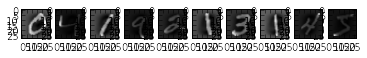

In [38]:
fig = plt.figure()
imgplot.set_interpolation('nearest')
for i in range(10):
    a=fig.add_subplot(1,10,i)
    plt.imshow(X[i,0,:,:], cmap=plt.get_cmap('gray'))

### Our first Simple Network
Now since we have loaded our data. Let's train a network with it. First we load the necessary libraries and then simply build our network. 
#### Definition of the network

In [43]:
from lasagne import layers
from lasagne import nonlinearities
from nolearn.lasagne import BatchIterator
from lasagne import nonlinearities
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    # Geometrie of the network
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, PIXELS, PIXELS),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_ds=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_ds=(2, 2),
    hidden4_num_units=500,
    output_num_units=10, output_nonlinearity=nonlinearities.softmax,

    # learning rate parameters
    update_learning_rate=0.01,
    update_momentum=0.9,
    regression=False,
    # We only train for 10 epochs
    max_epochs=10,
    verbose=1,

    # Training test-set split
    eval_size = 0.2
    )


####Training of the net. 
Note that the data is split automatically into 80% Training and 20% Testset. We don't have to take care about this. Since it takes quite a while to finish an epoch, we reduce the data to 1000 samples (800 training and 200 testing).

In [48]:
net1.fit(X[0:1000,:,:,:],y[0:1000])

  InputLayer        	(None, 1, 28, 28)   	produces     784 outputs
  Conv2DLayer       	(None, 32, 26, 26)  	produces   21632 outputs
  MaxPool2DLayer    	(None, 32, 13, 13)  	produces    5408 outputs
  Conv2DLayer       	(None, 64, 12, 12)  	produces    9216 outputs
  MaxPool2DLayer    	(None, 64, 6, 6)    	produces    2304 outputs
  DenseLayer        	(None, 500)         	produces     500 outputs
  DenseLayer        	(None, 2)           	produces       2 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------


TypeError: ('Bad input argument to theano function with name "/Users/oli/Selfinstalled/lasagne/src/nolearn/nolearn/lasagne.py:303"  at index 0(0-based)', 'Wrong number of dimensions: expected 4, got 3 with shape (128, 28, 28).')

In [50]:
X[0:1000,:,:,:].shape

(1000, 1, 28, 28)